In [74]:
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier


In [2]:
train_data = pd.read_csv('train_data.csv',index_col = 0)
test_kaggle = pd.read_csv('test_kaggle.csv',index_col=0)

In [3]:
train_data.columns

Index(['index', 'person', 'label', 'periodo', 'ad campaign hit_mean',
       'brand listing_mean', 'checkout_mean', 'conversion_mean',
       'generic listing_mean', 'lead_mean', 'search engine hit_mean',
       'searched products_mean', 'staticpage_mean', 'viewed product_mean',
       'visited site_mean', 'Bom', 'Bom - Sem Touch ID', 'Excelente',
       'Muito Bom', 'Novo', 'visitas_dom', 'visitas_lun', 'visitas_mar',
       'visitas_mier', 'visitas_jue', 'visitas_vier', 'visitas_sab',
       'conversiones_mean', 'vio_mas_de_5_veces', 'vio_color_mas_vendido',
       'returns_por_persona_mean'],
      dtype='object')

In [69]:
features = ['periodo', 'ad campaign hit_mean',
       'brand listing_mean', 'checkout_mean', 'conversion_mean',
       'generic listing_mean','search engine hit_mean',
       'searched products_mean', 'viewed product_mean',
       'visited site_mean', 'Bom', 'Bom - Sem Touch ID', 'Excelente',
       'Muito Bom', 'visitas_dom', 'visitas_lun', 'visitas_mar',
       'visitas_mier', 'visitas_jue', 'visitas_vier', 'visitas_sab',
       'conversiones_mean','returns_por_persona_mean']

In [70]:
X = train_data[features]
Y = train_data['label']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [75]:
params = {'n_estimators':[50,60,70,80,90,100],'objective':['binary:logistic','reg:linear']}

In [76]:
cv = GridSearchCV(estimator=xgb.XGBRegressor(),param_grid=params,scoring=xgb.XGBRegressor.score,cv=5)

In [77]:
dmatrix = xgb.DMatrix(data=train_data[features],label=train_data['label'],feature_names=features)

In [78]:
cv.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 60, 70, 80, 90, 100], 'objective': ['binary:logistic', 'reg:linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=<function RegressorMixin.score at 0x7f8649712bf8>,
       verbose=0)

In [90]:
cv.best_params_

{'n_estimators': 50, 'objective': 'binary:logistic'}

In [101]:
xgbRegressor = cv.best_estimator_ 


#xgb.XGBRegressor(objective='binary:logistic',colsample_bytree=0.4,
#                 gamma=0,
#                 max_delta_step=0,
 #                learning_rate=0.01,
  #               max_depth=6,
    #             min_child_weight=1.0,
    #             n_estimators=50,           
   #              reg_alpha=0.75,
  #               reg_lambda=0.45,
 #                subsample=0.75,
#                 seed=42)


In [73]:
#params = {'objective':'binary:logistic','colsample_bytree': 0.5, 'learning_rate': 1.0,
                #'max_depth' : 10, 'n_estimators' : 20,'seed':123}

#xgb.cv(dtrain=dmatrix,params=params)

[01:14:43] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=9
[01:14:43] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=10
[01:14:43] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=9
[01:14:43] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 348 extra nodes, 0 pruned nodes, max_depth=10
[01:14:43] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 272 extra nodes, 0 pruned nodes, max_depth=10
[01:14:43] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 280 extra nodes, 0 pruned nodes, max_depth=10
[01:14:43] /opt/conda/conda-bld/

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.048084,0.001230,0.054033,0.002599
1,0.045972,0.000576,0.055063,0.002536
2,0.042856,0.002171,0.058721,0.007204
3,0.036108,0.001130,0.059751,0.003175
4,0.029669,0.001742,0.060935,0.003803
5,0.024312,0.000811,0.062944,0.004120
6,0.020887,0.000906,0.063408,0.004455
7,0.017668,0.000788,0.062532,0.003940
8,0.015968,0.001764,0.062481,0.004630
9,0.014500,0.002253,0.062738,0.003264


In [102]:
xgbRegressor.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [103]:
xgbRegressor.score(X_test,Y_test)

0.10461581634567652

In [104]:
xg_reg = xgb.train(params=params, dtrain=dmatrix, num_boost_round=10)

[01:28:32] /opt/conda/conda-bld/xgboost_1541449690605/work/src/objective/objective.cc:21: Objective candidate: binary:hinge
[01:28:32] /opt/conda/conda-bld/xgboost_1541449690605/work/src/objective/objective.cc:21: Objective candidate: multi:softmax
[01:28:32] /opt/conda/conda-bld/xgboost_1541449690605/work/src/objective/objective.cc:21: Objective candidate: multi:softprob
[01:28:32] /opt/conda/conda-bld/xgboost_1541449690605/work/src/objective/objective.cc:21: Objective candidate: rank:pairwise
[01:28:32] /opt/conda/conda-bld/xgboost_1541449690605/work/src/objective/objective.cc:21: Objective candidate: rank:ndcg
[01:28:32] /opt/conda/conda-bld/xgboost_1541449690605/work/src/objective/objective.cc:21: Objective candidate: rank:map
[01:28:32] /opt/conda/conda-bld/xgboost_1541449690605/work/src/objective/objective.cc:21: Objective candidate: reg:linear
[01:28:32] /opt/conda/conda-bld/xgboost_1541449690605/work/src/objective/objective.cc:21: Objective candidate: reg:logistic
[01:28:32] /o

XGBoostError: b"[01:28:32] /opt/conda/conda-bld/xgboost_1541449690605/work/src/objective/objective.cc:23: Unknown objective function ['binary:logistic', 'reg:linear']\n\nStack trace returned 10 entries:\n[bt] (0) /home/aaron/anaconda3/lib/libxgboost.so(+0x9a30b) [0x7f864149a30b]\n[bt] (1) /home/aaron/anaconda3/lib/libxgboost.so(xgboost::ObjFunction::Create(std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > const&)+0x8a9) [0x7f86415a0fb9]\n[bt] (2) /home/aaron/anaconda3/lib/libxgboost.so(+0x13a402) [0x7f864153a402]\n[bt] (3) /home/aaron/anaconda3/lib/libxgboost.so(XGBoosterUpdateOneIter+0x7a) [0x7f864148e02a]\n[bt] (4) /home/aaron/anaconda3/lib/python3.6/lib-dynload/../../libffi.so.6(ffi_call_unix64+0x4c) [0x7f867ebd8ec0]\n[bt] (5) /home/aaron/anaconda3/lib/python3.6/lib-dynload/../../libffi.so.6(ffi_call+0x22d) [0x7f867ebd887d]\n[bt] (6) /home/aaron/anaconda3/lib/python3.6/lib-dynload/_ctypes.cpython-36m-x86_64-linux-gnu.so(_ctypes_callproc+0x2ce) [0x7f867edede2e]\n[bt] (7) /home/aaron/anaconda3/lib/python3.6/lib-dynload/_ctypes.cpython-36m-x86_64-linux-gnu.so(+0x12865) [0x7f867edee865]\n[bt] (8) /home/aaron/anaconda3/bin/python(_PyObject_FastCallDict+0x8b) [0x55fbfac68d7b]\n[bt] (9) /home/aaron/anaconda3/bin/python(+0x19e7ce) [0x55fbfacf87ce]\n\n"

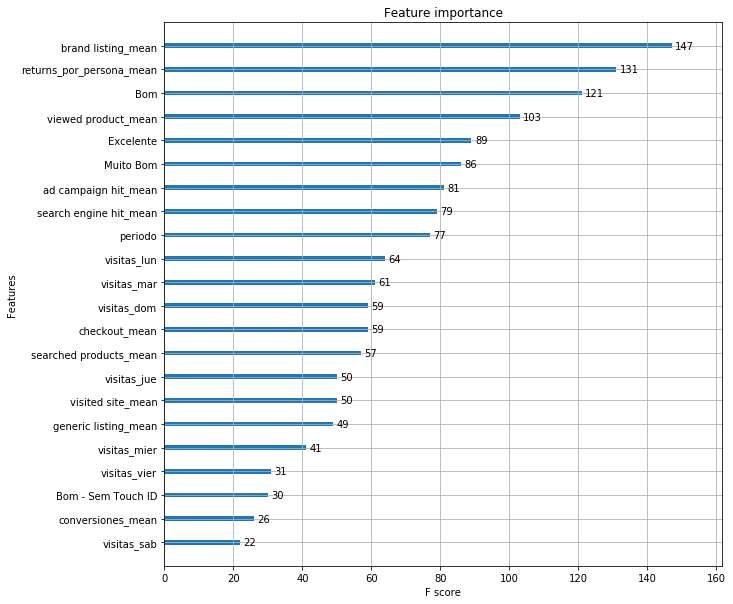

In [105]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

# Test Kaggle

In [106]:
test_kaggle['prediction'] = xgbRegressor.predict(test_kaggle[features])

In [107]:
submit_kaggle = pd.DataFrame({'person':test_kaggle['person'],'label':test_kaggle['prediction']})

In [108]:
submit_kaggle['label'] = submit_kaggle['label'].transform(lambda x: 0.0 if x < 0.0 else x)

In [109]:
submit_kaggle.reset_index(inplace = True)
submit_kaggle.drop(columns='index',inplace=True)
submit_kaggle.set_index(keys='person',inplace=True)

In [110]:
submit_kaggle.to_csv('submit_kaggle.csv')